In [1]:
import numpy as np
import pandas as pd

# we will use sigmoid activation function
# we will use binary class entropy loss function

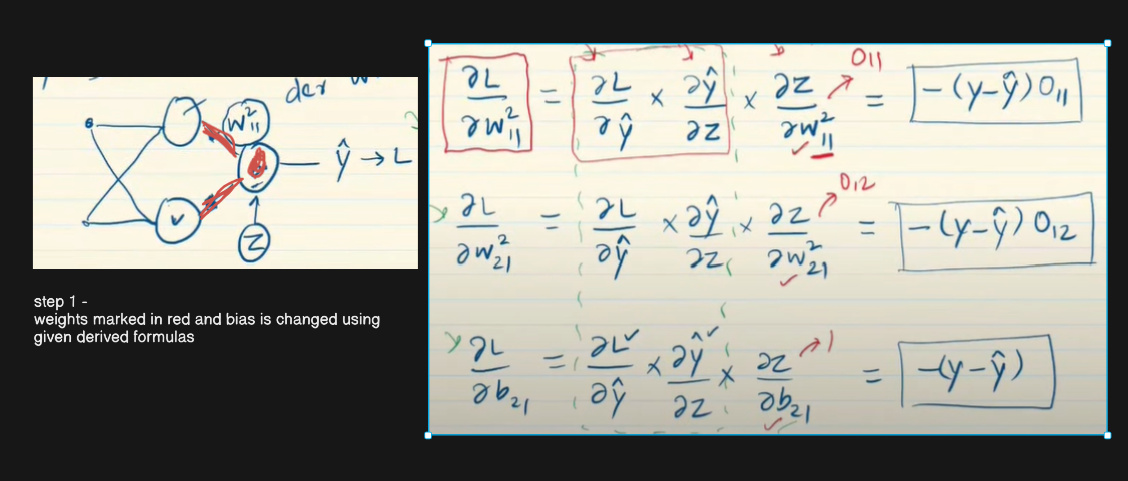

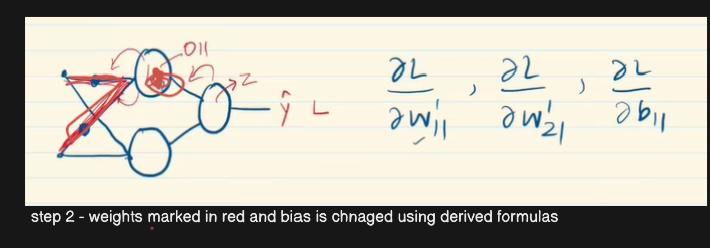

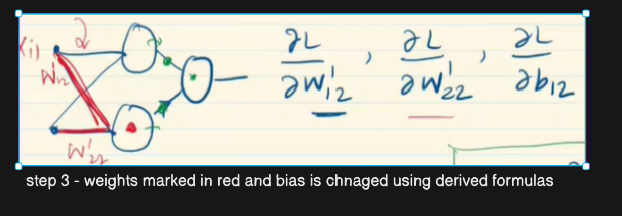

## total 9 derivatives

In [2]:
df = pd.DataFrame([[8,8,1],[7,9,1],[6,10,0],[5,5,0]], columns=['cgpa', 'profile_score', 'placed'])

In [3]:
df.head()

,cgpa,profile_score,placed
0,8,8,1
1,7,9,1
2,6,10,0
3,5,5,0


In [4]:
def initialize_parameters(layer_dims):

  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)

  for l in range(1, L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))


  return parameters

In [5]:
# Utility Functions
def sigmoid(Z):

  A = 1/(1+np.exp(-Z))

  return A

In [6]:
def linear_forward(A_prev, W, b):

  Z = np.dot(W.T, A_prev) + b

  A = sigmoid(Z)

  return A

In [7]:
# L-layer feed forward

def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network

  for l in range(1, L+1):
    A_prev = A
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)

  return A,A_prev


In [8]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.0001 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.0001 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.0001 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0])*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.0001 * (y - y_hat)*parameters['W2'][0][0]*A1[0][0]*(1-A1[0][0]))

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0])*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.0001 * (y - y_hat)*parameters['W2'][1][0]*A1[1][0]*(1-A1[1][0]))

In [9]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.613402628898913


{'W1': array([[0.10000513, 0.10000513],
        [0.10000513, 0.10000513]]),
 'b1': array([[6.41054186e-07],
        [6.41054186e-07]]),
 'W2': array([[0.10003815],
        [0.10003815]]),
 'b2': array([[0.100084]])}

In [10]:
X = df[['cgpa', 'profile_score']].values[1].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[1][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.568725622654268


{'W1': array([[0.10000937, 0.10001059],
        [0.10000937, 0.10001059]]),
 'b1': array([[1.24770113e-06],
        [1.24770113e-06]]),
 'W2': array([[0.10007424],
        [0.10007424]]),
 'b2': array([[0.10011761]])}

In [11]:
X = df[['cgpa', 'profile_score']].values[2].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[2][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.8353333695154365


{'W1': array([[0.10000463, 0.10000267],
        [0.10000463, 0.10000267]]),
 'b1': array([[4.56125378e-07],
        [4.56135584e-07]]),
 'W2': array([[0.10002712],
        [0.10002712]]),
 'b2': array([[0.09997049]])}

In [ ]:
X = df[['cgpa', 'profile_score']].values[3].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['placed']].values[3][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

print('Loss for this student - ',-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

parameters

Loss for this student -  0.8238180133031612


{'W1': array([[0.09999911, 0.09999716],
        [0.09999911, 0.09999716]]), 'W2': array([[0.09998609],
        [0.09998609]]), 'b1': array([[-6.47175329e-07],
        [-6.47175081e-07]]), 'b2': array([[0.09992997]])}

In [13]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 50

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['placed']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())

parameters

Epoch -  1 Loss -  0.7103199085929446
Epoch -  2 Loss -  0.6991702892802629
Epoch -  3 Loss -  0.6991679314811485
Epoch -  4 Loss -  0.6991655746710999
Epoch -  5 Loss -  0.6991632188496667
Epoch -  6 Loss -  0.699160864016399
Epoch -  7 Loss -  0.6991585101708473
Epoch -  8 Loss -  0.6991561573125619
Epoch -  9 Loss -  0.6991538054410936
Epoch -  10 Loss -  0.6991514545559935
Epoch -  11 Loss -  0.6991491046568126
Epoch -  12 Loss -  0.6991467557431024
Epoch -  13 Loss -  0.6991444078144144
Epoch -  14 Loss -  0.6991420608703007
Epoch -  15 Loss -  0.6991397149103132
Epoch -  16 Loss -  0.6991373699340042
Epoch -  17 Loss -  0.6991350259409265
Epoch -  18 Loss -  0.6991326829306324
Epoch -  19 Loss -  0.6991303409026751
Epoch -  20 Loss -  0.699127999856608
Epoch -  21 Loss -  0.6991256597919842
Epoch -  22 Loss -  0.6991233207083575
Epoch -  23 Loss -  0.6991209826052818
Epoch -  24 Loss -  0.699118645482311
Epoch -  25 Loss -  0.6991163093389996
Epoch -  26 Loss -  0.699113974174902

{'W1': array([[0.09994267, 0.09984548],
        [0.09994272, 0.09984548]]),
 'b1': array([[-3.38405750e-05],
        [-3.38419977e-05]]),
 'W2': array([[0.09920806],
        [0.09920816]]),
 'b2': array([[0.09915209]])}

# KEraS

In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [16]:


model = Sequential()


model.add(Dense(2,activation='sigmoid',input_dim = 2))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
optimizer = keras.optimizers.Adam(learning_rate= 0.001)
model.compile(loss='binary_crossentropy',optimizer=optimizer)


In [20]:


model.fit(df[['cgpa', 'profile_score']].values,df[['placed']].values,epochs=75,verbose=1,batch_size=2)

Epoch 1/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.7783
Epoch 2/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.9043
Epoch 3/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.7626
Epoch 4/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7644
Epoch 5/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.7634
Epoch 6/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7596
Epoch 7/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.7615
Epoch 8/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.7733
Epoch 9/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7722
Epoch 10/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.7712
Epoch 11/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7548
Epoch 12/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.7568
Epoch 13/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7682
Epoch 14/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.8792
Epoch 15/75
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.6406
Epoch 16/75
2/2 ━━━━━━━━━━━━━━━━━━